<a href="https://colab.research.google.com/github/dongzooo/Quant-with-py/blob/main/%EC%BA%94%EB%93%A4%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/3%EB%B6%84%EB%B4%895%EC%9D%B4%ED%8F%89_%EB%B3%80%EA%B3%A1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3분봉5이평변곡 시 1분봉 패턴분석

### 1. 데이터 불러오기

In [33]:
import yfinance as yf
import pandas as pd
from google.colab import files
import seaborn as sns
import statsmodels.api as sm

In [ ]:
files.upload()

In [38]:
df1Min = pd.read_csv("/content/ytd1MinData.csv")
df1Min = df1Min.drop(df1Min.columns[0], axis=1)
df1Min.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close','Volume']
df1Min.head()

df3Min = pd.read_csv("/content/ytd3MinData.csv")
df3Min = df3Min.drop(df3Min.columns[0], axis=1)
df3Min.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close','Volume']
df3Min.head()

,Timestamp,Open,High,Low,Close,Volume
0,23-05-12 14:42:00,15490,15490,15480,15490,194743
1,23-05-12 14:45:00,15490,15495,15480,15480,32627
2,23-05-12 14:48:00,15480,15490,15470,15470,130319
3,23-05-12 14:51:00,15475,15480,15460,15470,298905
4,23-05-12 14:54:00,15470,15470,15455,15465,109664


### 2. 3분봉 이평선 계산 및 변곡점 저장

In [39]:
# 3분봉에서 5이동평균선 변곡 확인
df3Min['5MA'] = df3Min['Close'].rolling(window=5).mean()
# df3Min['Return'] = df3Min['Close'].pct_change() * 100
df3Min.head(10)
# df3Min['MA_Crossover'] = df3Min['Moving Average'].diff().shift(-1).fillna(0).apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)

,Timestamp,Open,High,Low,Close,Volume,5MA
0,23-05-12 14:42:00,15490,15490,15480,15490,194743,NaN
1,23-05-12 14:45:00,15490,15495,15480,15480,32627,NaN
2,23-05-12 14:48:00,15480,15490,15470,15470,130319,NaN
3,23-05-12 14:51:00,15475,15480,15460,15470,298905,NaN
4,23-05-12 14:54:00,15470,15470,15455,15465,109664,15475.0
5,23-05-12 14:57:00,15465,15465,15450,15450,39633,15467.0
6,23-05-12 15:00:00,15455,15455,15435,15440,200830,15459.0
7,23-05-12 15:03:00,15435,15460,15435,15455,355742,15456.0
8,23-05-12 15:06:00,15460,15460,15445,15450,77761,15452.0
9,23-05-12 15:09:00,15450,15460,15445,15450,68316,15449.0


In [48]:
def findInflection(n, df_3min, df_1min, col_name):
    # 5이동평균선의 변곡이 발생하는 인덱스를 찾습니다.
    turning_points = []
    start_num = n + 1
    for i in range(start_num, len(df_3min)):
        # 변곡 발생
        if (df_3min[col_name].iloc[i] > df_3min[col_name].iloc[i - 1] < df_3min[col_name].iloc[i - 2]):
          #매수 시물레이션
          for j in range(i,len(df_3min))
            # 현봉저가와 전봉저가 비교
            if df_1min['Low'].iloc[i] < df_1min['Low'].iloc[i-1]:
                # 손절 조건: 현봉저가가 전봉저가보다 낮아지면
                continue
            # 수익률 계산
            return_pct = (df_1min['Close'].iloc[i] / df_1min['Close'].iloc[i - 1] - 1) * 100
            if return_pct >= 0.5:
                # 0.5% 이상의 수익이 발생한 경우 변곡 시점 저장
                turning_points.append(i)
    return turning_points

15480

In [40]:
# turning_points = []
filtered_df = pd.DataFrame()
def findInflection(n,df_3min,df_1min,col_name):
  # 5이동평균선의 변곡이 발생하는 인덱스를 찾습니다.
  turning_points = []
  start_num = n+1
  for i in range(start_num, len(df_3min)):
    # 변곡 발생
      if (df_3min[col_name].iloc[i] > df_3min[col_name].iloc[i-1] < df_3min[col_name].iloc[i-2]):

          #변곡 발생시점 저장
          turning_points.append(i)

  # 변곡점에 해당하는 1분봉 데이터를 분석합니다.
  for idx in turning_points:
      # 해당 변곡점에 대응하는 1분봉 데이터를 추출합니다.
      start_time = df_3min['Timestamp'].iloc[idx]
      end_time = df_3min['Timestamp'].iloc[idx+1]
      filtered_df = df_1min[(df_1min['Timestamp'] >= start_time) & (df_1min['Timestamp'] < end_time)]

      # 추출한 1분봉 데이터에 대한 분석 로직을 작성합니다.
      # 예를 들어, 분봉 데이터를 통한 통계 계산이나 패턴 분석 등을 수행할 수 있습니다.

      # 분석 결과를 출력하거나 다른 작업을 수행합니다.
      print("1분봉 데이터 분석 결과:")
      print(filtered_df.head())  # 예시로 추출한 데이터의 첫 몇 개를 출력합니다.
      print("===========================")
      return turning_points

In [ ]:
turning_points3Min = findInflection(5,df3Min, df1Min,"5MA")
for i in turning_points3Min:
  print(df3Min.iloc[i]['Timestamp'])

### 3. 1분봉 지표 생성

In [42]:
# 1분봉 이동평균선 계산
df1Min['3MA'] = df1Min['Close'].rolling(window=3).mean()
df1Min['5MA'] = df1Min['Close'].rolling(window=5).mean()
df1Min['10MA'] = df1Min['Close'].rolling(window=10).mean()
df1Min['20MA'] = df1Min['Close'].rolling(window=20).mean()

#거래이평선 계산
df1Min['2VMA'] = df1Min['Volume'].rolling(window=2).mean()
df1Min['5VMA'] = df1Min['Volume'].rolling(window=5).mean()
df1Min['10VMA'] = df1Min['Volume'].rolling(window=10).mean()
df1Min['20VMA'] = df1Min['Volume'].rolling(window=20).mean()

#현봉 전봉 거래량 비교
df1Min['VolumeChange'] = df1Min['Volume'].pct_change()
df1Min.head()

,Timestamp,Open,High,Low,Close,Volume,3MA,5MA,10MA,20MA,2VMA,5VMA,10VMA,20VMA,VolumeChange
0,23-05-19 12:15:00,16455,16465,16455,16460,12863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23-05-19 12:16:00,16460,16460,16450,16455,17320,NaN,NaN,NaN,NaN,15091.5,NaN,NaN,NaN,0.346498
2,23-05-19 12:17:00,16455,16465,16455,16465,46152,16460.000000,NaN,NaN,NaN,31736.0,NaN,NaN,NaN,1.664665
3,23-05-19 12:18:00,16470,16475,16465,16465,39957,16461.666667,NaN,NaN,NaN,43054.5,NaN,NaN,NaN,-0.134230
4,23-05-19 12:19:00,16465,16465,16450,16455,12474,16461.666667,16460.0,NaN,NaN,26215.5,25753.2,NaN,NaN,-0.687814


<ipython-input-44-442ad8ef609d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3Min.corr()  # 주식 시계열 데이터의 상관 계수 행렬 계산


NameError: ignored

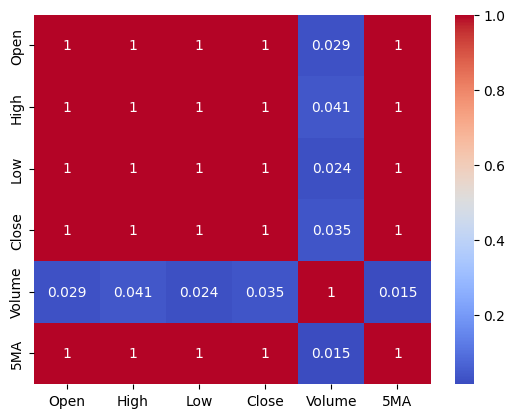

In [44]:
# 상관 분석
correlation_matrix = df3Min.corr()  # 주식 시계열 데이터의 상관 계수 행렬 계산
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # 상관 계수 히트맵 시각화

# 회귀 분석
X = df[['독립변수1', '독립변수2', ...]]  # 독립 변수 선택
y = df['종속변수']  # 종속 변수 선택

X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X)  # 회귀 분석 모델 생성
results = model.fit()  # 모델 피팅
print(results.summary())  # 회귀 분석 결과 요약 출력